<a href="https://colab.research.google.com/github/schauppi/Udemy_TensorFlow_Developer/blob/main/Abschnitt_4_Neural_Network_classification_with_TensorFlow/%2002_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Introduction to neural network classification with TensorFlow

# Types of Classification
* Binary classification
* Multiclass classification
* Multilabel classification

# Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

#make 1000 examples
n_samples = 1000

#Create circles
x,y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
x[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

#Visualize the data

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0" :x[:, 0], "X1":x[:, 1], "labels":y })

In [6]:
circles

,X0,X1,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [7]:
circles["labels"].value_counts()

1    500
0    500
Name: labels, dtype: int64

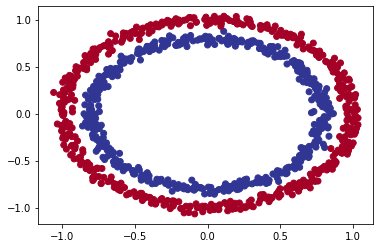

In [8]:
#Visualize data with plot
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu) #cm = Red, Yellow, Blue

#Input and output shapes

In [9]:
#Check the shapes of our features and labels
x.shape, y.shape

((1000, 2), (1000,))

In [10]:
#How many samples we´re working 
len(x), len(y)

(1000, 1000)

In [11]:
#View the first ecamples of features and labels
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

#Steps in modelling

In [12]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [13]:
#Set the random seed
tf.random.set_seed(42)

#Create a model
model_1 = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile the model
model_1.compile(loss="BinaryCrossentropy", metrics=["accuracy"], optimizer="Adam")

#Fit the model 
model_1.fit(x,y, epochs=5, verbose=0)

In [14]:
#Evaluate the model
model_1.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.5000


[0.7012460231781006, 0.5]

In [15]:
#Let´s try and improve our model by training for longer...
model_1.fit(x, y, epochs=200, verbose=0)
model_1.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4960


[0.6931473016738892, 0.4959999918937683]

Since we´re working on a binary classification problem and our model is getting around 50% accuracy... it´s performing as if it´s guessing

So let´s step things up and add an extra layer

In [16]:
#Set random seed
tf.random.set_seed(42)

#create the model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)
])

#compile the model
model_2.compile(loss="BinaryCrossentropy", metrics=["accuracy"], optimizer="SGD")

#fit the model
model_2.fit(x, y, epochs=100, verbose=0)

In [17]:
#evaluate the model
model_2.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

#Improving our model

1. Create a model - add more layers, increase number of hidden units
2. Compile th model - different optimization function
3. Fit the model - more epochs

In [18]:
#set random seed
tf.random.set_seed(42)

#create the model
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10), 
                               tf.keras.layers.Dense(1)
                               
])

#compile the model

model_3.compile(loss="BinaryCrossentropy", metrics="accuracy", optimizer="Adam")

#fit the model
model_3.fit(x, y, epochs=100, verbose=0)

In [19]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [20]:
#evaluate the model
model_3.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5090


[0.6980189681053162, 0.5090000033378601]

#Visualize the predictions
To visualize oure model´s predictions, let´s create a function plot_decision_boundary().
This function will
* Take in a trained model, features (x) and labels (y)
* Create a meshgrid of th different x values
 * make predictions across the meshgrid
 * Plot te predictions as well as a line between zones (where each unique class falls)

In [21]:
print((model_3.predict(x))[:10])

[[0.48797876]
 [0.55872166]
 [0.56276834]
 [0.5704467 ]
 [0.44131777]
 [0.5738096 ]
 [0.5576471 ]
 [0.4825075 ]
 [0.47739536]
 [0.57502663]]


In [22]:
import numpy as np

In [23]:
def plot_decision_boundary(model, x, y):
  """
  Plots the decision boundary created by a model predicting on x.
  """
  #Define the axis boubdaries of the plot and create meshgrid - 0.1 for mor margin
  x_min = x[:, 0].min() - 0.1
  x_max = x[:, 0].max() + 0.1
  y_min = x[:, 1].min() - 0.1
  y_max = x[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

  #Create x value 
  x_in = np.c_[xx.ravel(), yy.ravel()] #stack 2D arrays together

  #Make predictions
  y_pred = model.predict(x_in)

  #Check if multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    #We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=2).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  #Plot the decision boundary
  plt.contour(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classification


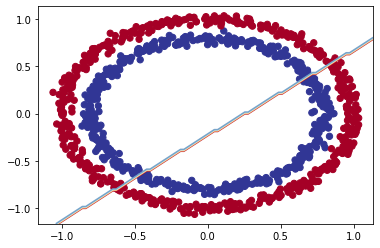

In [24]:
#Check out the prediction our model is making
plot_decision_boundary(model_3, x, y)

In [25]:
#Let´s see if our model can be used for a regression problem..

tf.random.set_seed(42)

#create some regression data
x_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = x + 100

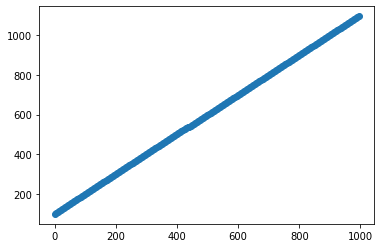

In [26]:
plt.scatter(x_regression, y_regression)

In [27]:
#Split our regression data into training and test sets
x_reg_train = x_regression[:150]
x_reg_test = x_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [28]:
#model_3.fit(x_reg_train, y_reg_train, epochs=100, verbose=0)

We compiled our model for a binary classification problem.
But we´re no workung on a regression problem - let´s change the model for our data

In [29]:
#set random seed
tf.random.set_seed(42)

#create the model
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10), 
                               tf.keras.layers.Dense(1)
                               
])

#compile the model

model_3.compile(loss="mae", metrics=["mae"], optimizer="Adam")

#fit the model
model_3.fit(x_reg_train, y_reg_train, epochs=150, verbose=0)

In [30]:
model_3.evaluate(x_reg_test, y_reg_test)

2/2 [==============================] - 0s 7ms/step - loss: 54.6104 - mae: 54.6104


[54.610389709472656, 54.610389709472656]

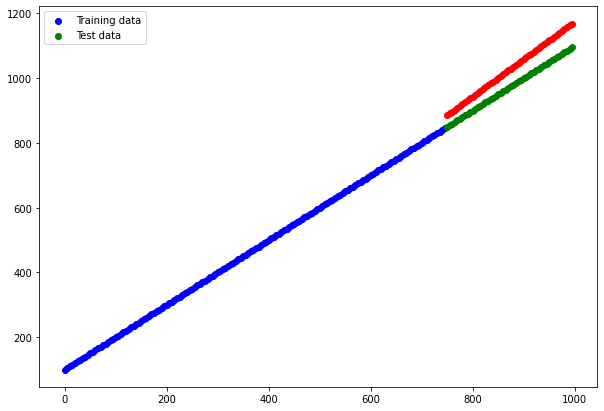

In [31]:
y_reg_preds = model_3.predict(x_reg_test)

#plot the models predictions
plt.figure(figsize=(10, 7))
plt.scatter(x_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(x_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(x_reg_test, y_reg_preds, c="r")
plt.legend()

# Non-linearity

In [35]:
#Set random seed
tf.random.set_seed(42)

#Create th model 
model_4 = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

#Compile the model
model_4.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="Adam")

#Fit the model
model_4.fit(x, y, epochs=100, verbose=0)

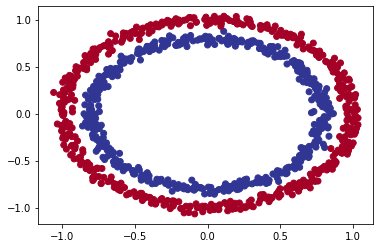

In [38]:
#check out out data
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

doing binary classification


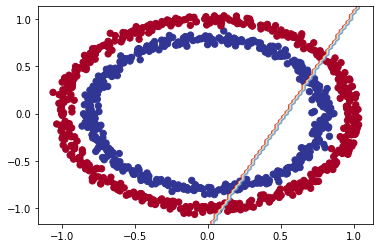

In [39]:
#Check the decision boundary for our latest model
plot_decision_boundary(model_4, x, y)

Let´s try build our first neural network with a non-linear activation function

In [41]:
#set random seed
tf.random.set_seed(42)

#Create a model with a non-linear activation function
model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, activation="relu")
])

#Compile the model
model_5.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="Adam")

#Fit the model
history = model_5.fit(x, y, epochs=100, verbose=0)

In [58]:
#set random seed
tf.random.set_seed(42)

#Create the model
model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(1, activation="relu"),
])

#Compile the model
model_6.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="Adam")

#Fit the model
history = model_6.fit(x, y, epochs=250, verbose=0)

In [59]:
model_6.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classification


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: No contour levels were found within the data range.


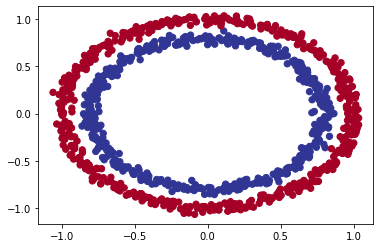

In [60]:
#How do our model predictions look like
plot_decision_boundary(model_6, x, y)

In [65]:
#set random seed
tf.random.set_seed(42)

#Create the model
model_7 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid"),
])

#Compile the model
model_7.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="Adam")

#Fit the model
history = model_7.fit(x, y, epochs=250, verbose=0)

In [66]:
model_7.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 0.9920


[0.04593364894390106, 0.9919999837875366]

doing binary classification


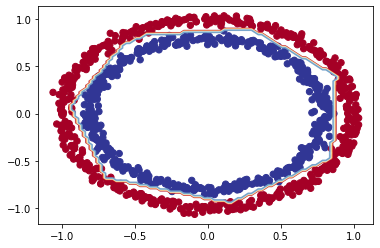

In [67]:
plot_decision_boundary(model_7, x, y)